# 1. Authenticate to Twitter

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
import seaborn as sns

In [2]:
consumerKey="Vl1yCS3v3tS7psJ52P1IlCY9q"
consumerSecret="EWglg7zet8TFqg1OQsRAqqdUwxXvVvSPgA3kGBEu6xAnbWMyPy"
accessToken="1342236145434943488-XLkJIBNzc7grJwQxWqOt3SKImMkKix"
accessTokenSecret="tZQKrjLx2iQvcz8LxhUp4jjjPR8Bmmo48A91y6WtJLJ2k"


# 2. Get Tweets

#pip install snscrape

In [3]:
query ="OrganicMeat"
tweets=[]
limit= 1000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    #print(vars(tweet))
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
tweets_df= pd.DataFrame(tweets,columns=['Timestamp','User','Tweet'])
print(tweets_df)

                    Timestamp             User  \
0   2023-01-04 12:03:53+00:00         lidgates   
1   2023-01-03 18:05:08+00:00      RawCowsMilk   
2   2023-01-03 11:58:11+00:00  AkashLo41721298   
3   2023-01-02 20:32:03+00:00      artdoorlife   
4   2022-12-31 16:49:40+00:00      RawCowsMilk   
..                        ...              ...   
995 2018-01-15 21:05:06+00:00    OrganicAndYou   
996 2018-01-15 01:50:04+00:00      Raptorazor1   
997 2018-01-14 05:25:19+00:00  Grandpas_Place1   
998 2018-01-14 03:48:50+00:00      Sighted_In_   
999 2018-01-14 01:50:06+00:00      Raptorazor1   

                                                 Tweet  
0    #lidgatesbutchers #ButcherDelivery #hollandpar...  
1    What’s on your menu for dinner tonight? 📷 @lee...  
2    Organic Meat Products Market\nGet Free Sample ...  
3    Successful rabbit hunt today!  It's already sk...  
4    Happy New Years Eve! We hope yours is as tasty...  
..                                                 ...  


In [4]:
tweets_df.shape

(1000, 3)

In [5]:
tweets_df.head(20)

,Timestamp,User,Tweet
0,2023-01-04 12:03:53+00:00,lidgates,#lidgatesbutchers #ButcherDelivery #hollandpar...
1,2023-01-03 18:05:08+00:00,RawCowsMilk,What’s on your menu for dinner tonight? 📷 @lee...
2,2023-01-03 11:58:11+00:00,AkashLo41721298,Organic Meat Products Market\nGet Free Sample ...
3,2023-01-02 20:32:03+00:00,artdoorlife,Successful rabbit hunt today! It's already sk...
4,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...
5,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...
6,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...
7,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...
8,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...
9,2022-12-22 08:07:09+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...


# 3. Preprocess

In [6]:
meat_refs=['Organic','Meat','meat','organicmeat', 'organic','chicken','A']
protein_refs=['protein', 'fresh','raw','gut friendly', 'healthy diet','freerange']

In [7]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag =1
    return flag

tweets_df['meat']=tweets_df['Tweet'].apply(lambda x: identify_subject(x, meat_refs ))
tweets_df['chicken']=tweets_df['Tweet'].apply(lambda x: identify_subject(x, protein_refs))


In [8]:
tweets_df.head()

,Timestamp,User,Tweet,meat,chicken
0,2023-01-04 12:03:53+00:00,lidgates,#lidgatesbutchers #ButcherDelivery #hollandpar...,1,1
1,2023-01-03 18:05:08+00:00,RawCowsMilk,What’s on your menu for dinner tonight? 📷 @lee...,1,0
2,2023-01-03 11:58:11+00:00,AkashLo41721298,Organic Meat Products Market\nGet Free Sample ...,1,0
3,2023-01-02 20:32:03+00:00,artdoorlife,Successful rabbit hunt today! It's already sk...,1,0
4,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1


In [9]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT: ', '',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    return txt

In [10]:
tweets_df['Tweet'] = tweets_df['Tweet'].apply(cleanUpTweet)

In [11]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity


In [12]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
tweets_df['Subjectivity']= tweets_df['Tweet'].apply(getTextSubjectivity)
tweets_df['Polarity']= tweets_df['Tweet'].apply(getTextPolarity)

In [14]:
tweets_df.head(50)
meat = tweets_df[tweets_df['meat'] ==1][['Timestamp','Polarity']]
meat = meat.sort_values(by = 'Timestamp', ascending = True)
meat['OR Polarity'] = meat.Polarity.rolling(10, min_periods=3).mean()

chicken = tweets_df[tweets_df['chicken'] ==1][['Timestamp','Polarity']]
chicken = chicken.sort_values(by = 'Timestamp', ascending = True)
chicken['OR Polarity'] = chicken.Polarity.rolling(10, min_periods=3).mean()

In [15]:
chicken.head()

,Timestamp,Polarity,OR Polarity
959,2018-02-12 22:26:40+00:00,-0.112500,NaN
958,2018-02-12 22:36:06+00:00,-0.112500,NaN
921,2018-04-10 22:12:53+00:00,-0.217188,-0.147396
920,2018-04-12 12:07:12+00:00,0.334722,-0.026866
913,2018-04-25 03:16:03+00:00,0.562500,0.091007


# 4. Calculate Sentiment

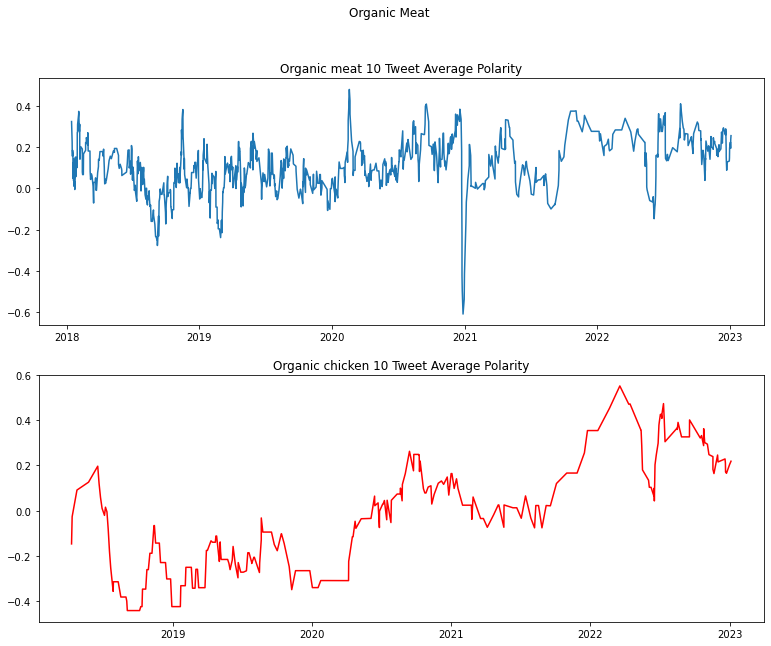

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))

axes[0].plot(meat['Timestamp'], meat['OR Polarity'])
axes[0].set_title("\n".join(['Organic meat 10 Tweet Average Polarity']))

axes[1].plot(chicken['Timestamp'], chicken['OR Polarity'], color='red')
axes[1].set_title("\n".join(['Organic chicken 10 Tweet Average Polarity']))

fig.suptitle('\n'.join(['Organic Meat']), y=0.98)
plt.show()

In [17]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [18]:
tweets_df["Score"]= tweets_df['Polarity'].apply(getTextAnalysis)

In [19]:
tweets_df.head(50)

,Timestamp,User,Tweet,meat,chicken,Subjectivity,Polarity,Score
0,2023-01-04 12:03:53+00:00,lidgates,lidgatesbutchers ButcherDelivery hollandparkbu...,1,1,0.000000,0.000000,Neutral
1,2023-01-03 18:05:08+00:00,RawCowsMilk,What’s on your menu for dinner tonight? 📷 of ...,1,0,0.537500,0.412500,Positive
2,2023-01-03 11:58:11+00:00,AkashLo41721298,Organic Meat Products Market\nGet Free Sample ...,1,0,0.266667,0.266667,Positive
3,2023-01-02 20:32:03+00:00,artdoorlife,Successful rabbit hunt today! It's already sk...,1,0,0.675000,0.318750,Positive
4,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1,0.727273,0.485227,Positive
5,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...,1,0,0.400000,0.400000,Positive
6,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 selfsufficient pract...,1,0,0.000000,0.000000,Neutral
7,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...,1,0,0.750000,0.812500,Positive
8,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 organicfarming...,1,1,0.000000,0.000000,Neutral
9,2022-12-22 08:07:09+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...,1,0,0.404167,-0.150000,Negative


In [20]:
# Store the column of the dataframe named as "Tweet"
X = tweets_df['Tweet']

# Display the value "X"
print(X)

0      lidgatesbutchers ButcherDelivery hollandparkbu...
1      What’s on your menu for dinner tonight? 📷  of ...
2      Organic Meat Products Market\nGet Free Sample ...
3      Successful rabbit hunt today!  It's already sk...
4      Happy New Years Eve! We hope yours is as tasty...
                             ...                        
995    Philadelphia Pennsylvania looking to buy organ...
996    The only way to field dress and skin a wild an...
997    RT : Is there a better view? Hunt Hunting Hunt...
998    Is there a better view? Hunt Hunting HuntingBl...
999    Our winter sale is still going on! Save now wi...
Name: Tweet, Length: 1000, dtype: object


In [21]:
# Store the column if the dataframe named as  "Score"
y = tweets_df['Score']

# Display the column of the dataframe named as "Score"
print(y)

0       Neutral
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
995     Neutral
996    Positive
997    Positive
998    Positive
999    Negative
Name: Score, Length: 1000, dtype: object


**Plot the Score visualization graph**

<AxesSubplot:xlabel='Score', ylabel='count'>

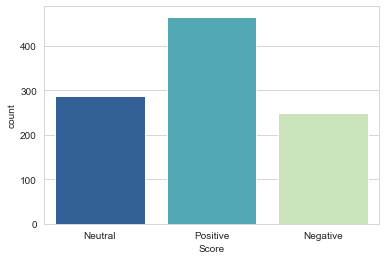

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Score',data=tweets_df, palette='YlGnBu_r')

# 5. Data Cleaning

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [25]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters

for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [26]:
# Display the cleaned_data
cleaned_data

['lidgatesbutch butcherdeliveri hollandparkbutch nottinghillbutch freerangemeat organicmeat carnivor',
 'menu dinner tonight instagram thank share fillet steak us look outstand filletsteak organicsteak organicmeat organicfarm organicfood sustaimablefarm pendlehil ribblevalley lancashirefarm',
 'organ meat product market get free sampl pdf report prove effect tool player use gain competit edg competitor ensur last success global organ meat market organicmeat meat product',
 'success rabbit hunt today alreadi skin clean soak salt water slow cooker cottontail cottontailrabbit rabbit hunt hunt rabbithunt outdoor optoutsid optoutdoor organicmeat eatloc eatlocalgrown',
 'happi new year eve hope tasti organicfarm organicmeat organicchees sustainablefarm nye pendlehil lancashir rawmilk newyearsev',
 'rabbit meat avail book order monday thursday deliv friday sunday rabbitmeat rabbitsmeat organicmeat khargosht',
 'mom nail gift selfsuffici practicalskil hunt outdoorlif girlpow organicmeat claytr

In [27]:
print(y)

0       Neutral
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
995     Neutral
996    Positive
997    Positive
998    Positive
999    Negative
Name: Score, Length: 1000, dtype: object


In [28]:
# Collect all columns into dataframe named as sentiment_ordering
sentiment_ordering = ['Negative', 'Neutral', 'Positive']

# store all values into column named as "y"
y = y.apply(lambda x: sentiment_ordering.index(x))

In [29]:
y.head()

0    1
1    2
2    2
3    2
4    2
Name: Score, dtype: int64

# 6. Bag of Words using CountVectorizer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv    = CountVectorizer(max_features = 5000, stop_words = ['organicmeat', 'freerang'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

(1000, 4357)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [32]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [33]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [34]:
# Call predict() method
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        69
           1       0.74      0.42      0.53        89
           2       0.65      0.90      0.76       142

    accuracy                           0.68       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.70      0.68      0.66       300



# 7. Feature Generation using TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an object 'tf' by calling a method TfidfVectorizer()
tfidf = TfidfVectorizer(max_features = 5000, stop_words = ['organicmeat', 'freerang'])

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(cleaned_data).toarray()

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model_tdidf = MultinomialNB()

In [38]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3)

In [39]:
# Train the model by calling a method fit()
model_tdidf.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Call predict() method
y_pred = model_tdidf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.98      0.59      0.73        68
           1       0.84      0.19      0.30        86
           2       0.60      0.99      0.75       146

    accuracy                           0.67       300
   macro avg       0.81      0.59      0.60       300
weighted avg       0.76      0.67      0.62       300

